<a href="https://colab.research.google.com/github/RasilaMoidheensha006/MediScan-AI/blob/main/Medical_Prescription_OCR_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Tesseract OCR and required Python libraries
!apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python matplotlib Pillow


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
#importing Libraries
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image


In [3]:
#Uploading prescription image
# Upload your prescription image (jpg, png, etc.)
uploaded = files.upload()
image_path = list(uploaded.keys())[0]


Saving Medical Prescription.png to Medical Prescription.png


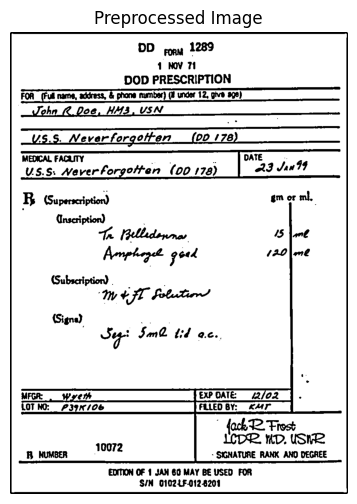

In [4]:
#Processing image
def preprocess_pdf(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian Blur
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 31, 2)
    return thresh

processed_image = preprocess_pdf(image_path)

# Show the processed image
plt.figure(figsize=(8,6))
plt.imshow(processed_image, cmap='gray')
plt.axis('off')
plt.title('Preprocessed Image')
plt.show()


In [5]:
#Extracting Text using Tesseract
def extract_text(image_path):
    pil_img = Image.fromarray(image_path)
    text = pytesseract.image_to_string(pil_img)
    return text

extracted_text = extract_text(processed_image)
print("Extracted Text:\n")
print(extracted_text)


Extracted Text:

DD roam 1289
1 NO 71
DOD PRESCRIPTION

Le
FOR_ (Full name, address, & phone number) (# under 12, give 908)

hn od, HM3, USN

—
USS. Neverforgottent fo 176)
MEDICAL FACRITY . . . DATE .

US.S: Weverforgotfen (00 178) 3 Jan

5 (Superseription) gm or ml,
Tr plladenros
Aonphoge poe
Subscription)
‘Wt FT Pobukirrd
Signs).

Se Sond ld a.c.,

FLLED BY: KANT

{och Frost
ICD. KD, USN
- SIGNATURE RANK ANO DEGREE

EDITION OF { JAN 60 MAY BE USED FOR
S/N 01024F-012-6209

 



In [ ]:
# Save the extracted text to a file
with open("extracted_prescription.txt", "w") as f:
    f.write(extracted_text)

# Download the file
files.download("extracted_prescription.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>